<a href="https://colab.research.google.com/github/MojtabaHeidari/MHM/blob/main/Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Python Modules**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Bioinformatics data analysis and visualization toolkit
#!pip install bioinfokit

In [3]:
#from bioinfokit.visuz import cluster

## **Upload File**

In [4]:
#from google.colab import files
#uploaded = files.upload()

In [6]:
#read cvs file into dataframe
df = pd.read_csv('W9.csv')
df.head(n=25)

,Class,Alcohol,Alcalinity of ash,Total phenols,Flavanoids,Color intensity,Hue,Proline
0,1,14.23,15.6,2.80,3.06,5.64,1.04,1065
1,1,13.20,11.2,2.65,2.76,4.38,1.05,1050
2,1,13.16,18.6,2.80,3.24,5.68,1.03,1185
3,1,14.37,16.8,3.85,3.49,7.80,0.86,1480
4,1,13.24,21.0,2.80,2.69,4.32,1.04,735
5,1,14.20,15.2,3.27,3.39,6.75,1.05,1450
6,1,14.39,14.6,2.50,2.52,5.25,1.02,1290
7,1,14.06,17.6,2.60,2.51,5.05,1.06,1295
8,1,14.83,14.0,2.80,2.98,5.20,1.08,1045
9,1,13.86,16.0,2.98,3.15,7.22,1.01,1045


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Class              178 non-null    int64  
 1   Alcohol            178 non-null    float64
 2   Alcalinity of ash  178 non-null    float64
 3   Total phenols      178 non-null    float64
 4   Flavanoids         178 non-null    float64
 5   Color intensity    178 non-null    float64
 6   Hue                178 non-null    float64
 7   Proline            178 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 11.2 KB


### **Classes**

In [8]:
y = df['Class']
target = df['Class'].to_numpy()

### **Features**

Data Matrix

In [9]:
X = df.iloc[:,1:8]
X.head(10)

,Alcohol,Alcalinity of ash,Total phenols,Flavanoids,Color intensity,Hue,Proline
0,14.23,15.6,2.80,3.06,5.64,1.04,1065
1,13.20,11.2,2.65,2.76,4.38,1.05,1050
2,13.16,18.6,2.80,3.24,5.68,1.03,1185
3,14.37,16.8,3.85,3.49,7.80,0.86,1480
4,13.24,21.0,2.80,2.69,4.32,1.04,735
5,14.20,15.2,3.27,3.39,6.75,1.05,1450
6,14.39,14.6,2.50,2.52,5.25,1.02,1290
7,14.06,17.6,2.60,2.51,5.05,1.06,1295
8,14.83,14.0,2.80,2.98,5.20,1.08,1045
9,13.86,16.0,2.98,3.15,7.22,1.01,1045


In [10]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Color intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00
Hue,178.0,0.957449,0.228572,0.48,0.7825,0.965,1.1200,1.71
Proline,178.0,746.893258,314.907474,278.00,500.5000,673.500,985.0000,1680.00


Notice that the data is not standardizd. So we need to standarize it.

In [11]:
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,-8.619821e-16,1.002821,-2.434235,-0.788245,0.061000,0.836129,2.259772
Alcalinity of ash,178.0,-1.160121e-16,1.002821,-2.671018,-0.689137,0.001518,0.602088,3.154511
Total phenols,178.0,-2.972030e-16,1.002821,-2.107246,-0.885468,0.095960,0.808997,2.539515
Flavanoids,178.0,-4.016762e-16,1.002821,-1.695971,-0.827539,0.106150,0.849085,3.062832
Color intensity,178.0,-1.122697e-17,1.002821,-1.634288,-0.795103,-0.159225,0.493956,3.435432
Hue,178.0,3.717376e-16,1.002821,-2.094732,-0.767562,0.033127,0.713164,3.301694
Proline,178.0,-7.484650e-18,1.002821,-1.493188,-0.784638,-0.233720,0.758249,2.971473


Notice that the data is now standardizd.

**Observations and variables**

In [13]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177]
['Alcohol', 'Alcalinity of ash', 'Total phenols', 'Flavanoids', 'Color intensity', 'Hue', 'Proline']


## **Data Visualisation**

### Class Distribution

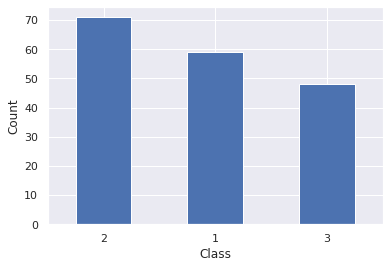

In [14]:
y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Box & Whisker Plots

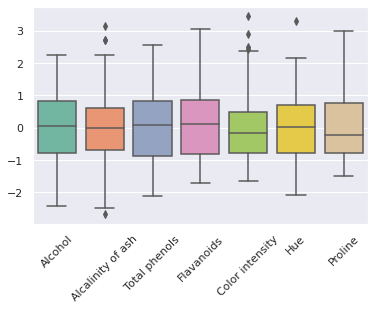

In [15]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

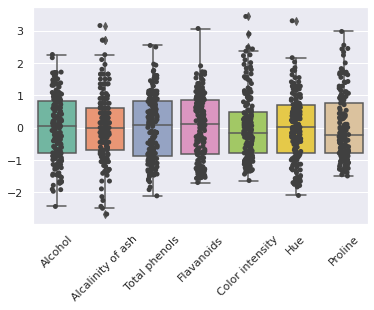

In [16]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

### Five Number Summary

In [17]:
df.describe()

,Alcohol,Alcalinity of ash,Total phenols,Flavanoids,Color intensity,Hue,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-1.160121e-16,-2.972030e-16,-4.016762e-16,-1.122697e-17,3.717376e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-2.671018e+00,-2.107246e+00,-1.695971e+00,-1.634288e+00,-2.094732e+00,-1.493188e+00
25%,-7.882448e-01,-6.891372e-01,-8.854682e-01,-8.275393e-01,-7.951025e-01,-7.675624e-01,-7.846378e-01
50%,6.099988e-02,1.518295e-03,9.595986e-02,1.061497e-01,-1.592246e-01,3.312687e-02,-2.337204e-01
75%,8.361286e-01,6.020883e-01,8.089974e-01,8.490851e-01,4.939560e-01,7.131644e-01,7.582494e-01
max,2.259772e+00,3.154511e+00,2.539515e+00,3.062832e+00,3.435432e+00,3.301694e+00,2.971473e+00


### Pair Plot

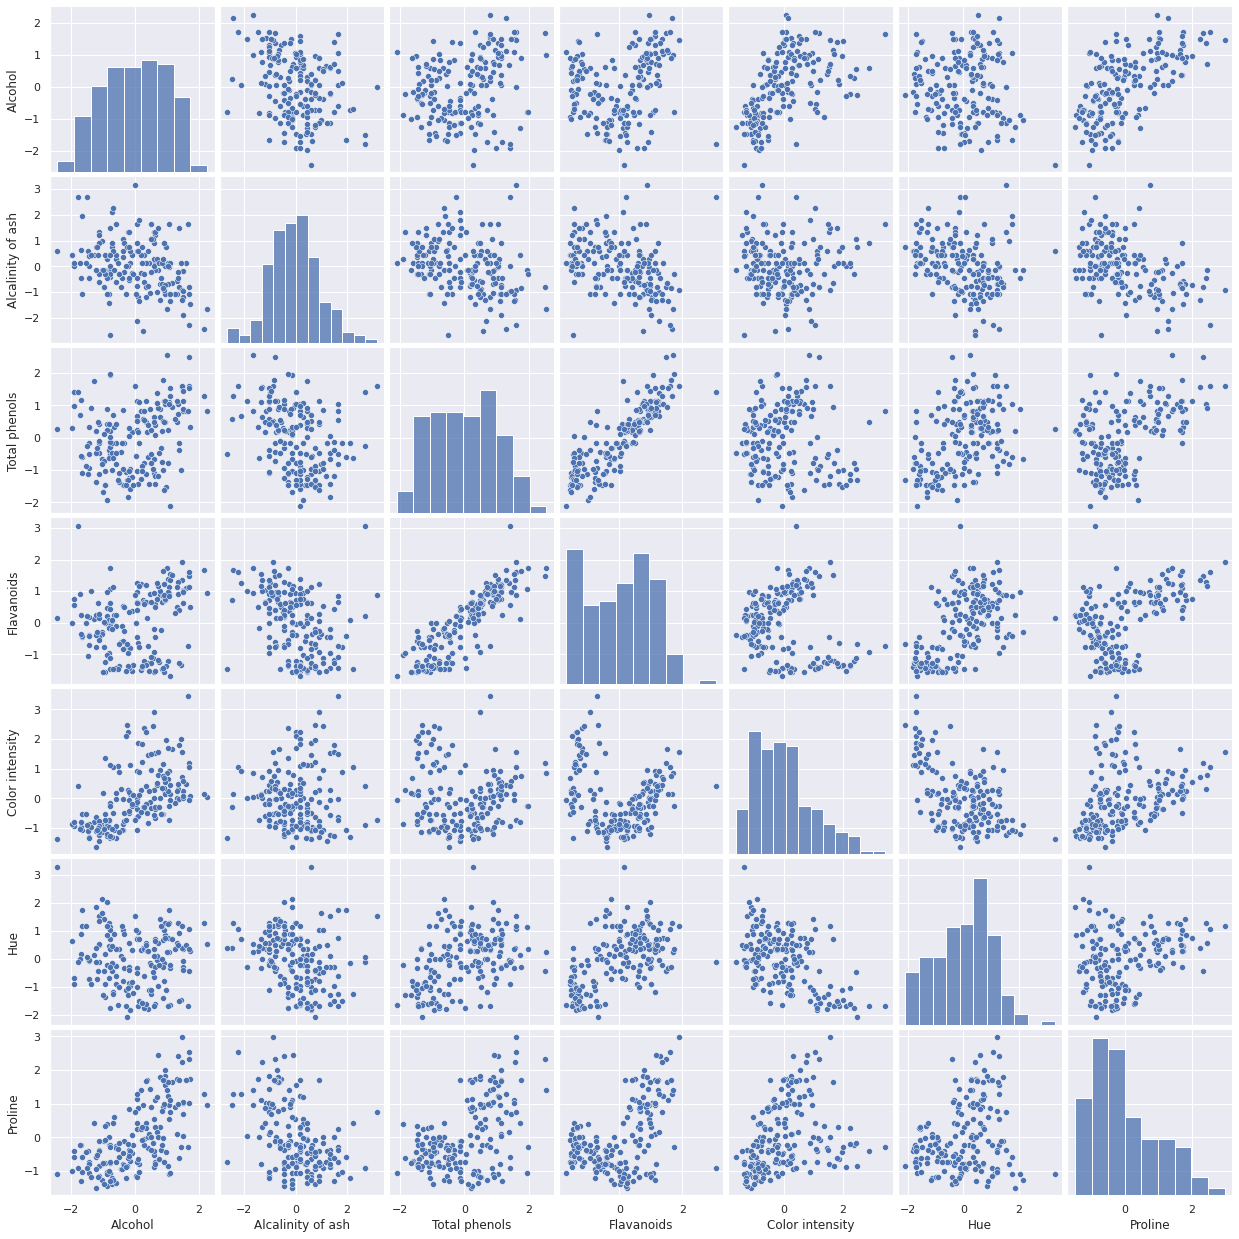

In [18]:
sns.pairplot(df)

## **Covariance**

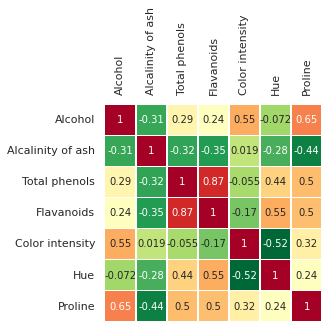

In [19]:
dfc = df - df.mean() #centered data
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);
#plt.title('Covariance matrix')

## **Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

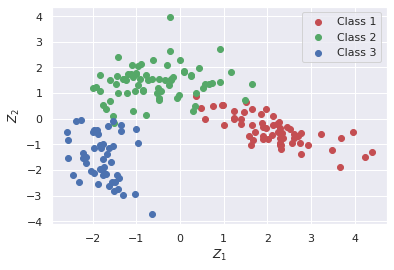

In [20]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)


C1 = np.where(y == 1)
C2 = np.where(y == 2)
C3 = np.where(y == 3)

plt. figure()
plt.scatter(Z[C1,0], Z[C1,1], c='r', label='Class 1')
plt.scatter(Z[C2,0], Z[C2,1], c='g', label='Class 2')
plt.scatter(Z[C3,0], Z[C3,1], c='b', label='Class 3')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
#for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
#    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
#        textcoords='offset points', ha='right', va='bottom')

### **Eigenvectors**

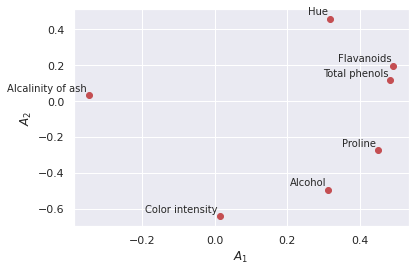

In [21]:
A = pca.components_.T 
#print(f'Eigenvector matrix:\n{A}')

plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


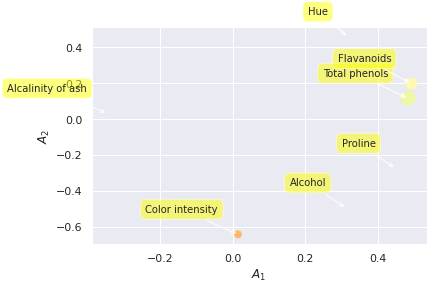

In [22]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

### **Scree plot**

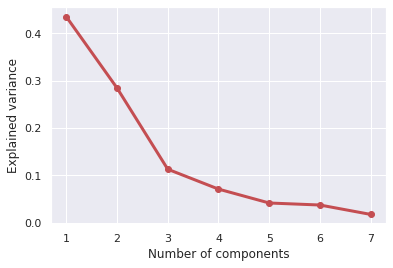

In [23]:
#Eigenvalues
Lambda = pca.explained_variance_ 
#print(f'Eigenvalues:\n{Lambda}')

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()


### **Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

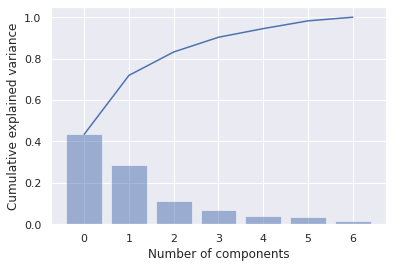

In [24]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Explained Variance per PC**

In [25]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (43.5%)',
 '1': 'PC 2 (28.4%)',
 '2': 'PC 3 (11.3%)',
 '3': 'PC 4 (7.1%)',
 '4': 'PC 5 (4.2%)',
 '5': 'PC 6 (3.7%)',
 '6': 'PC 7 (1.8%)'}

### **Biplot**

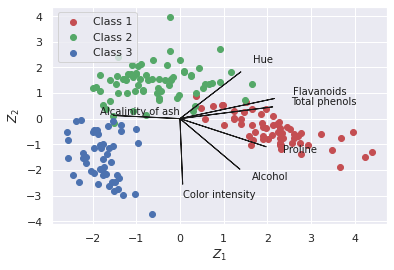

In [39]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
A3 = A[:,2]
Z1 = Z[:,0] 
Z2 = Z[:,1]
Z3 = Z[:,2]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[C1,0], Z[C1,1], c='r', label='Class 1')
plt.scatter(Z[C2,0], Z[C2,1], c='g', label='Class 2')
plt.scatter(Z[C3,0], Z[C3,1], c='b', label='Class 3')
plt.legend(loc='upper left')
#for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
  #plt.scatter(Z1[i], Z2[i], c='g', marker='o')
  #plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

In [27]:
#cluster.biplot(cscore=Z, loadings=A, labels=X.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2), 
#               var2=round(pca.explained_variance_ratio_[1]*100, 2), colorlist=target)

**Using PCA Librarry**

In [28]:
!pip install pca

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=4e275a829a78a0bf184444bd274392169dcbef04ed240532a6d717aaad5a4252
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [29]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(df)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [6] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[6]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [30]:
 # Print the top features. The results show that f1 is best, followed by f2 etc
print(out['topfeat'])

    PC            feature   loading  type
0  PC1         Flavanoids  0.493076  best
1  PC2    Color intensity -0.643385  best
2  PC3  Alcalinity of ash  0.818232  best
3  PC4                Hue -0.600398  best
4  PC5            Alcohol  0.744164  best
5  PC6    Color intensity  0.646216  best
6  PC1      Total phenols  0.484254  weak
7  PC5            Proline -0.563862  weak


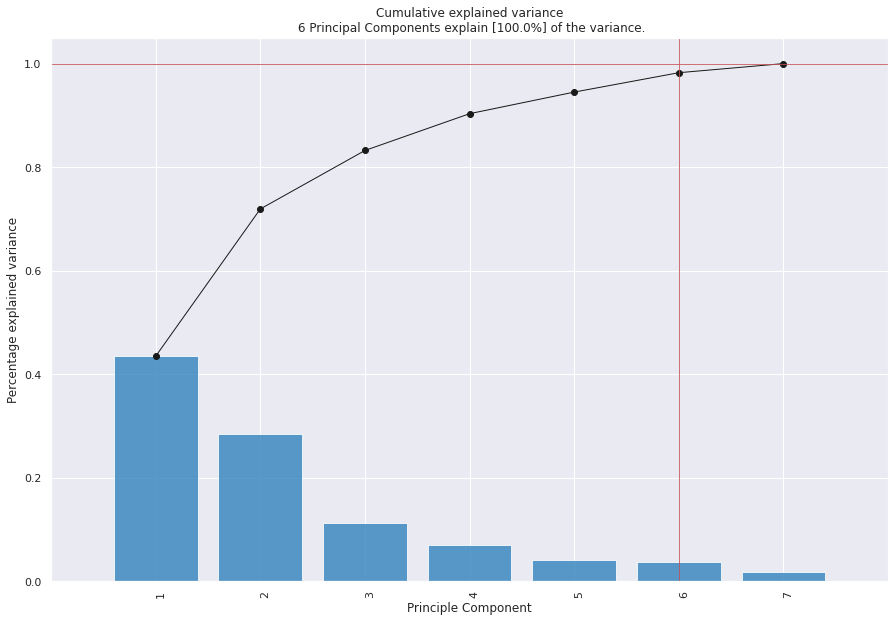

<Figure size 432x288 with 0 Axes>

In [31]:
model.plot();

[pca] >Plot PC1 vs PC2 with loadings.


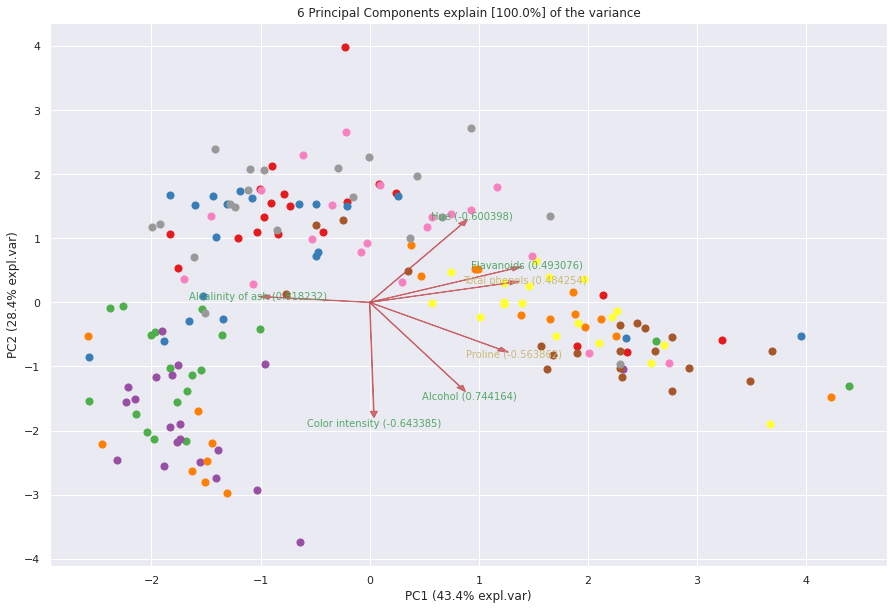

In [32]:
 ax = model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 with loadings.


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


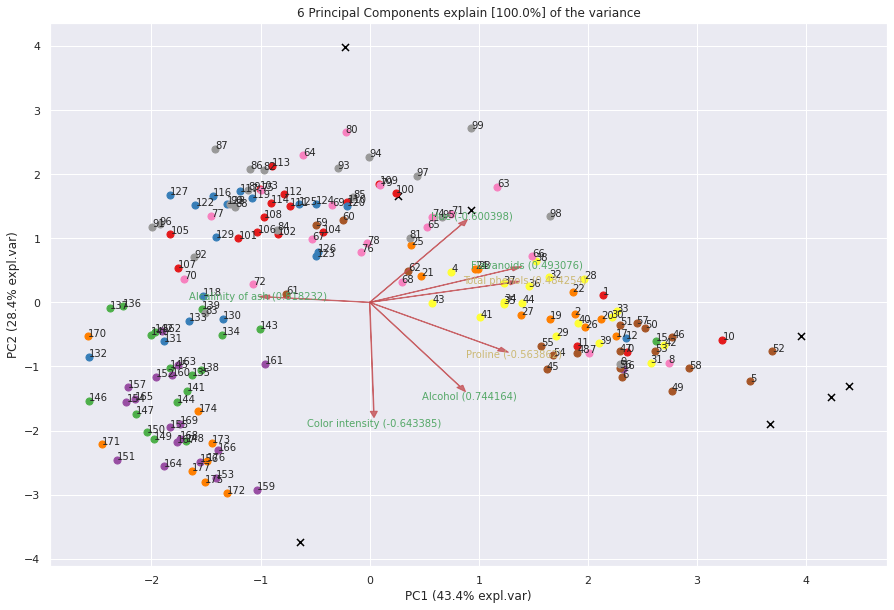

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f59397d23d0>)

In [33]:
model.biplot(legend=False, hotellingt2=True)

[pca] >Plot PC1 vs PC2 with loadings.


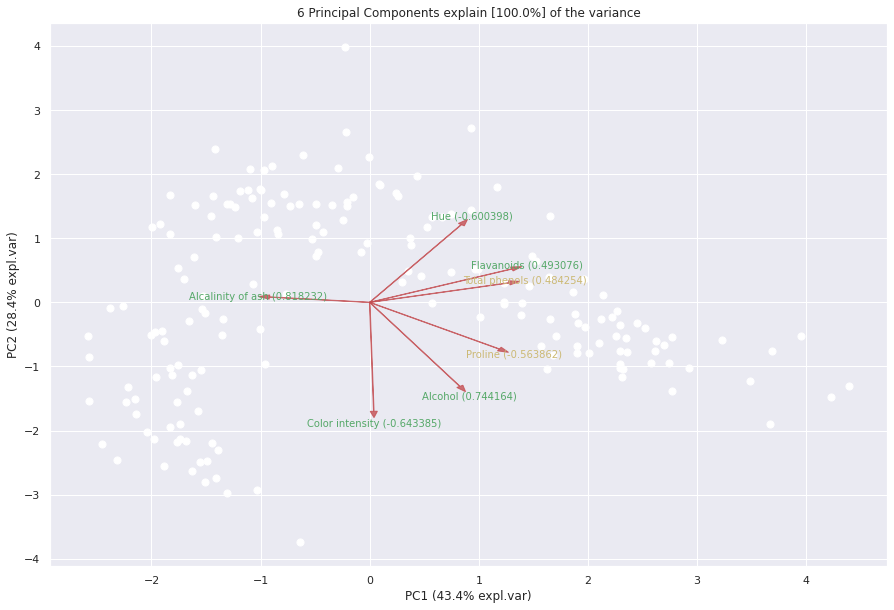

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5939818510>)

In [34]:
model.biplot(cmap=None, label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


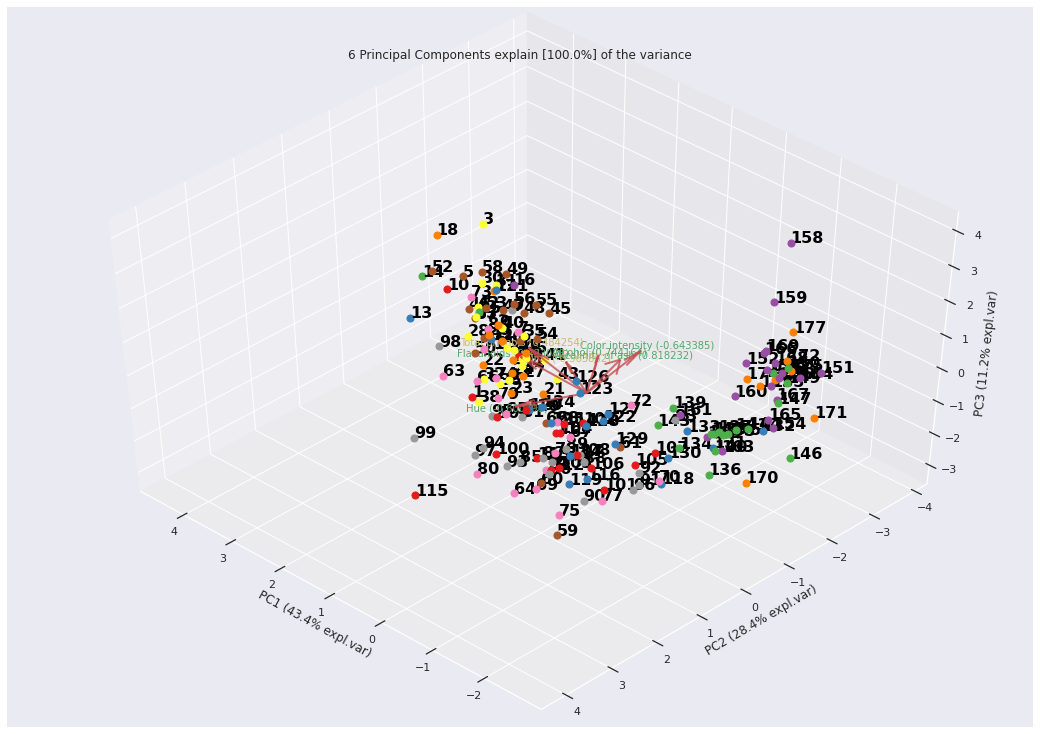

In [35]:
ax = model.biplot3d(legend=False)

### **Principal components**

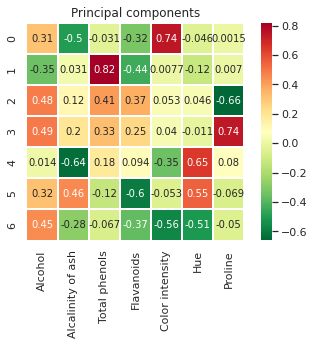

PC1:[ 0.31276755 -0.34783514  0.48425398  0.49307609  0.01416223  0.31793222
  0.44975523]
PC2:[-0.4960614   0.0314008   0.11542967  0.19730231 -0.64338492  0.4591035
 -0.27561691]
PC3:[-0.03131544  0.81823234  0.41388892  0.32630939  0.17867341 -0.1238462
 -0.06686752]


In [40]:
comps = pd.DataFrame(A, columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=True, square=True)

plt.xticks(rotation=90)
plt.title('Principal components')
plt.show()

print(f'PC1:{A1}')
print(f'PC2:{A2}')
print(f'PC3:{A3}')

### **Hotelling's T2 test**

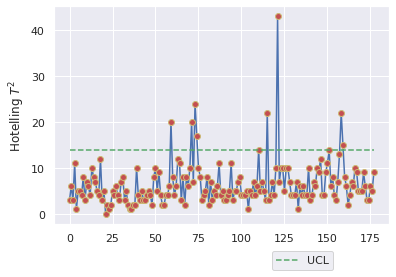

In [41]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling $T^2$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

In [42]:
print(np.argwhere(Tsquare>UCL))

[[ 59]
 [ 71]
 [ 73]
 [ 74]
 [110]
 [115]
 [121]
 [151]
 [158]
 [159]]


### **Control Charts for Principal Components**

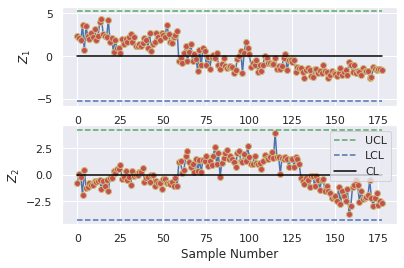

In [43]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('$Z_2$')
ax2.set_xlabel('Sample Number')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend()

#### Out of Control Points

In [44]:
print(np.argwhere(Z1<-3*np.sqrt(Lambda[0])))
print(np.argwhere(Z1>3*np.sqrt(Lambda[0])))
print(np.argwhere(Z2<-3*np.sqrt(Lambda[1])))
print(np.argwhere(Z2>3*np.sqrt(Lambda[1])))

[]
[]
[]
[]


## **Multi-Class Classification**

In [47]:
# Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.3, random_state=0)
print(f'Train Dataset Size: {X_train.shape[0]}')
print(f'Test Dataset Size: {X_test.shape[0]}')

Z_train, Z_test, zy_train, zy_test = train_test_split(Z, Y, test_size=0.3, random_state=0)
Z12_train, Z12_test, z12y_train, z12y_test = train_test_split(Z[:,:2], Y, test_size=0.3, random_state=0)

# Define the evaluation metric
scoring = ['f1_macro']

NameError: ignored

### Gaussian Naive Bayes (GNB)

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           1      0.773     0.895     0.829        19
           2      0.917     0.815     0.863        27
           3      1.000     1.000     1.000        17

    accuracy                          0.889        63
   macro avg      0.896     0.903     0.897        63
weighted avg      0.896     0.889     0.890        63



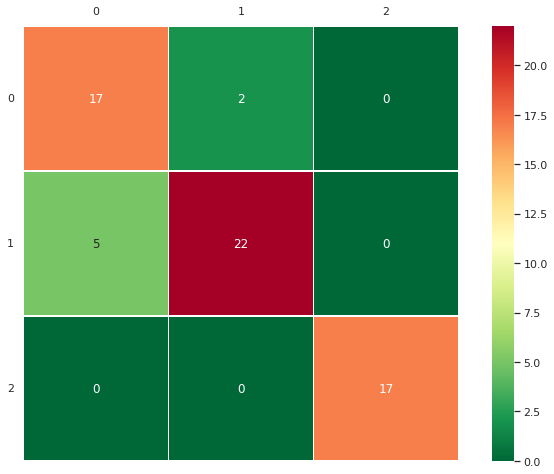

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           1      0.900     0.947     0.923        19
           2      0.962     0.926     0.943        27
           3      1.000     1.000     1.000        17

    accuracy                          0.952        63
   macro avg      0.954     0.958     0.955        63
weighted avg      0.953     0.952     0.953        63



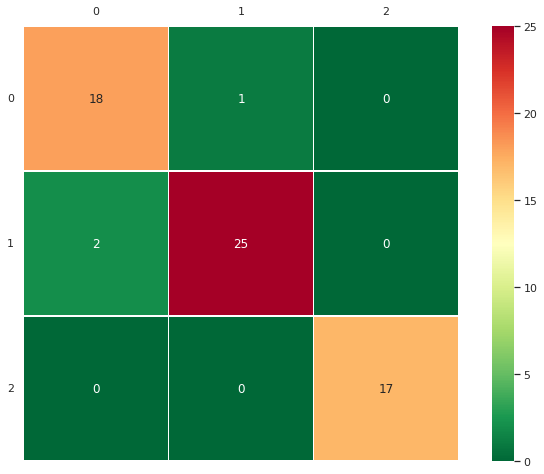

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           1      0.857     0.947     0.900        19
           2      0.960     0.889     0.923        27
           3      1.000     1.000     1.000        17

    accuracy                          0.937        63
   macro avg      0.939     0.945     0.941        63
weighted avg      0.940     0.937     0.937        63



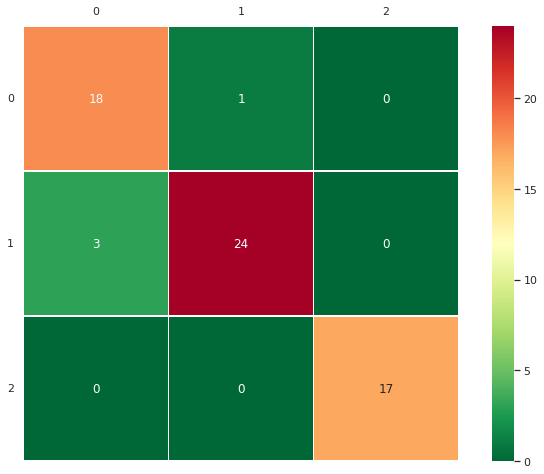

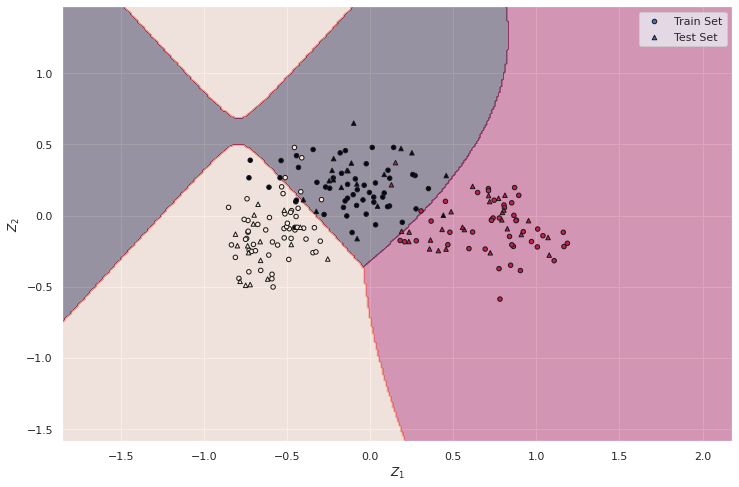

(array([27, 32, 39, 54]),)


In [ ]:
gnb = GaussianNB()

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  gnb.fit(Xtr, ytr)
  y_pred = gnb.predict(Xtst)
  gnb_score = gnb.score(Xtst, ytst)
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_gnb = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_gnb, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Naive Bayes Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    print(np.where(ytst != y_pred))

### K Nearest Neighbors (KNN)

Grid Search Results:
k_full_data: {'n_neighbors': 8}
k_Z: {'n_neighbors': 8}
k_Z12: {'n_neighbors': 8}
                                    0         1         2         3         4
knn_full_data fit_time       0.002192  0.002130  0.002300  0.002731  0.001946
knn_Z  fit_time              0.000586  0.000604  0.000588  0.000588  0.000753
knn_Z12 fit_time             0.000617  0.000790  0.000709  0.000687  0.000558
knn_full_data test_f1_macro  0.903890  0.934216  0.967963  1.000000  0.865320
knn_Z  test_f1_macro         0.903890  0.934216  0.967963  1.000000  0.865320
knn_Z12 test_f1_macro        0.903890  0.898982  0.967963  0.961905  0.791667

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           1      0.842     0.842     0.842        19
           2      0.923     0.889     0.906        27
           3      0.944     1.000     0.971        17

    accuracy                          0.905        63
   macro avg      0.903     0.910   

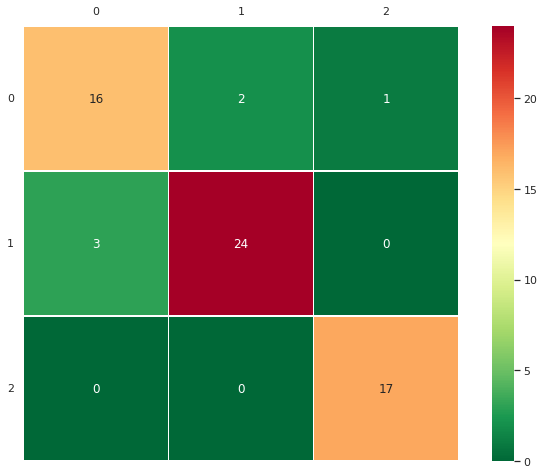

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           1      0.842     0.842     0.842        19
           2      0.923     0.889     0.906        27
           3      0.944     1.000     0.971        17

    accuracy                          0.905        63
   macro avg      0.903     0.910     0.906        63
weighted avg      0.904     0.905     0.904        63



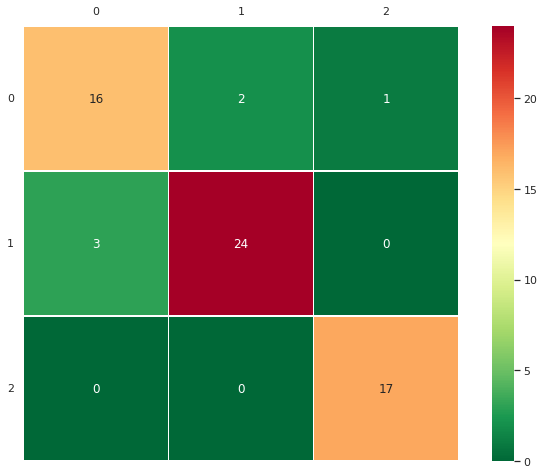

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           1      0.882     0.789     0.833        19
           2      0.926     0.926     0.926        27
           3      0.895     1.000     0.944        17

    accuracy                          0.905        63
   macro avg      0.901     0.905     0.901        63
weighted avg      0.904     0.905     0.903        63



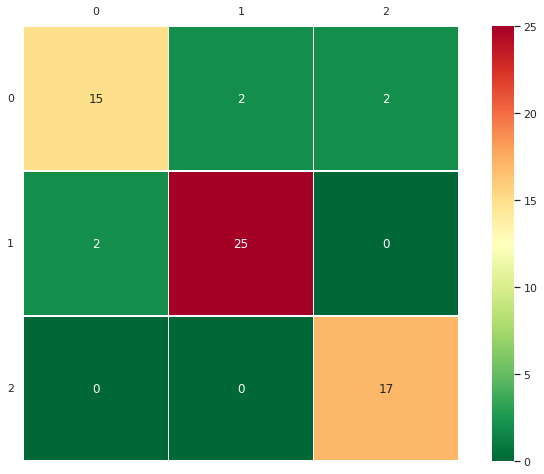

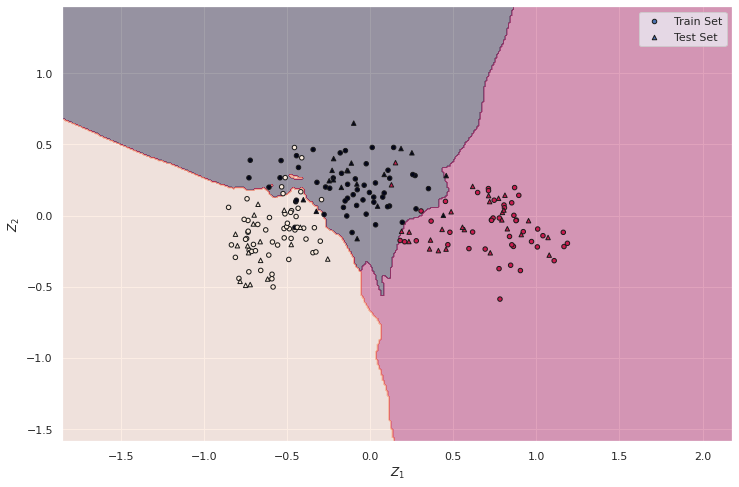

In [ ]:
# Hyperparameter grid search for k
param_grid = {'n_neighbors': [2, 4, 8, 16, 32]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Find best k
knn_full_data = grid_search.fit(X_train, y_train)
knn_Z = grid_search.fit(Z_train, zy_train)
knn_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best k
print('Grid Search Results:')
k_full_data = knn_full_data.best_params_
k_Z = knn_Z.best_params_
k_Z12 = knn_Z12.best_params_
print(f'k_full_data: {k_full_data}\nk_Z: {k_Z}\nk_Z12: {k_Z12}')

# Apply best k
knn = KNeighborsClassifier(n_neighbors=k_full_data.get('n_neighbors'))
scores_knn_full_data = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)
scores_knn_Z = cross_validate(knn, Z_train, zy_train, cv=5, scoring=scoring)
scores_knn_Z12 = cross_validate(knn, Z12_train, z12y_train, cv=5, scoring=scoring)

knn_scores_dict={}
for i in ['fit_time','test_f1_macro']:
  knn_scores_dict["knn_full_data " + i ] = scores_knn_full_data[i]
  knn_scores_dict["knn_Z  " + i ] = scores_knn_Z[i]
  knn_scores_dict["knn_Z12 " + i ] = scores_knn_Z12[i]

knn_scores_data = pd.DataFrame(knn_scores_dict).T
#knn_scores_data['avgs'] = knn_scores_data.mean(axis=1)
print(f'{knn_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  knn.fit(Xtr, ytr)
  y_pred = knn.predict(Xtst)
  knn_score = knn.score(Xtst, ytst)
  #print(f'\nTest Set Accuracy: {knn_score:.3f}')
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_knn = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_knn, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('KNN Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    # print(np.where(ytst != y_pred))

### Decision Trees (DT)

Grid Search Results:
depth_full_data: {'max_depth': 4}
depth_Z: {'max_depth': 4}
depth_Z12: {'max_depth': 4}
                                   0         1         2         3         4
dt_full_data fit_time       0.002468  0.001901  0.001909  0.001911  0.001920
dt_Z  fit_time              0.000705  0.000698  0.000723  0.000714  0.000729
dt_Z12 fit_time             0.000581  0.000555  0.000525  0.000554  0.000534
dt_full_data test_f1_macro  0.870370  0.902470  0.967963  1.000000  0.897698
dt_Z  test_f1_macro         0.808333  0.932566  0.935185  0.899856  0.792593
dt_Z12 test_f1_macro        0.838251  0.902470  0.967963  0.935185  0.757516

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           1      0.889     0.842     0.865        19
           2      0.962     0.926     0.943        27
           3      0.895     1.000     0.944        17

    accuracy                          0.921        63
   macro avg      0.915     0.923    

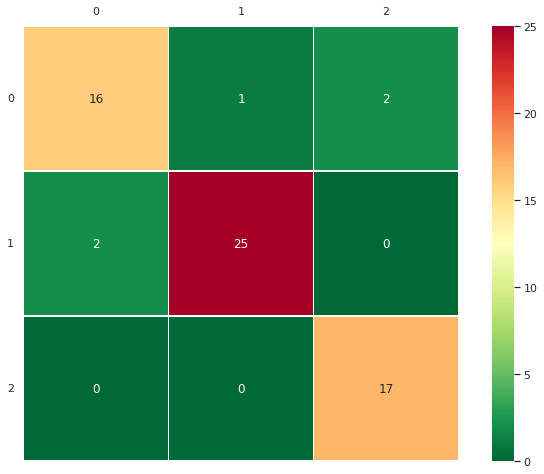

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           1      0.778     0.737     0.757        19
           2      0.852     0.852     0.852        27
           3      0.889     0.941     0.914        17

    accuracy                          0.841        63
   macro avg      0.840     0.843     0.841        63
weighted avg      0.840     0.841     0.840        63



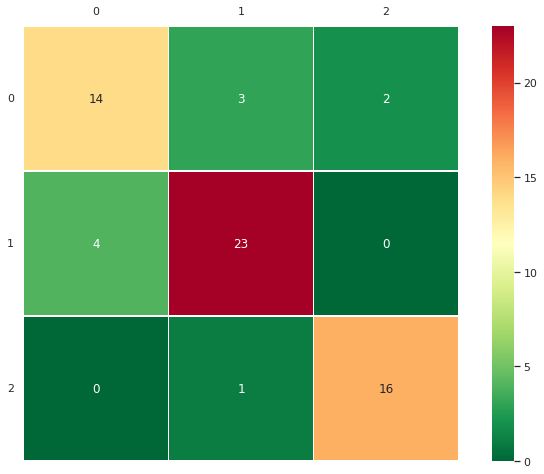

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           1      0.778     0.737     0.757        19
           2      0.852     0.852     0.852        27
           3      0.889     0.941     0.914        17

    accuracy                          0.841        63
   macro avg      0.840     0.843     0.841        63
weighted avg      0.840     0.841     0.840        63



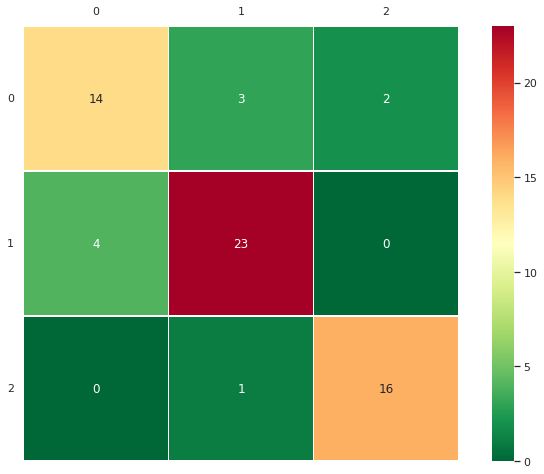

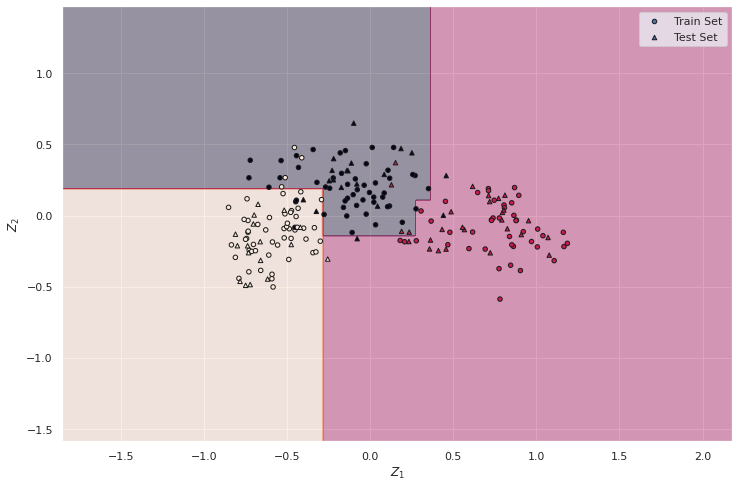

In [ ]:
# Hyperparameter search for DT depth
param_grid = {'max_depth': [2, 4, 8, 16, 32, 64]}
dt = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Find best depth
dt_full_data = grid_search.fit(X_train, y_train)
dt_Z = grid_search.fit(Z_train, zy_train)
dt_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best tree depth
print('Grid Search Results:')
depth_full_data = dt_full_data.best_params_
depth_Z = dt_Z.best_params_
depth_Z12 = dt_Z12.best_params_
print(f'depth_full_data: {depth_full_data}\ndepth_Z: {depth_Z}\ndepth_Z12: {depth_Z12}')

# Apply best k
dt = DecisionTreeClassifier(max_depth=depth_full_data.get('max_depth'))
scores_dt_full_data = cross_validate(dt, X_train, y_train, cv=5, scoring=scoring)
scores_dt_Z = cross_validate(dt, Z_train, zy_train, cv=5, scoring=scoring)
scores_dt_Z12 = cross_validate(dt, Z12_train, z12y_train, cv=5, scoring=scoring)

dt_scores_dict={}
for i in ['fit_time', 'test_f1_macro']:
  dt_scores_dict["dt_full_data " + i ] = scores_dt_full_data[i]
  dt_scores_dict["dt_Z  " + i ] = scores_dt_Z[i]
  dt_scores_dict["dt_Z12 " + i ] = scores_dt_Z12[i]

dt_scores_data = pd.DataFrame(dt_scores_dict).T
#dt_scores_data['avgs'] = dt_scores_data.mean(axis=1)
print(f'{dt_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  dt.fit(Xtr, ytr)
  y_pred = dt.predict(Xtst)
  dt_score = dt.score(Xtst, ytst)
  #print(dt_score)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_dt = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_dt, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Decision Tree Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

## **ROC Curves**

DATASET: FULL DATA


/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 0 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


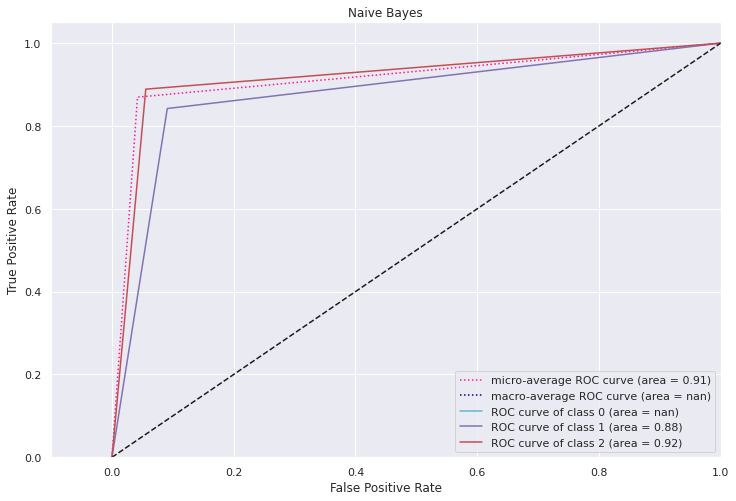

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 0 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


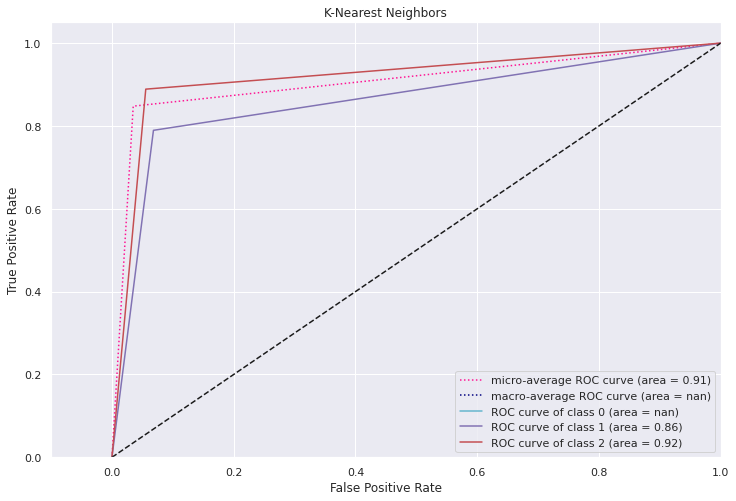

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 0 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


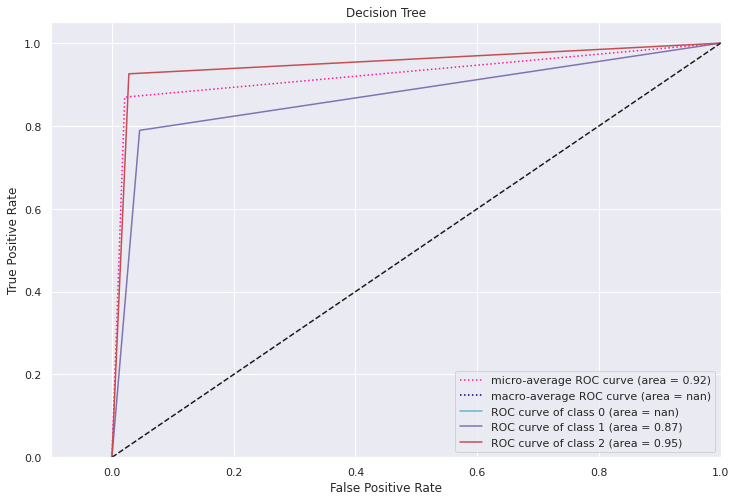

DATASET: Z


/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 0 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


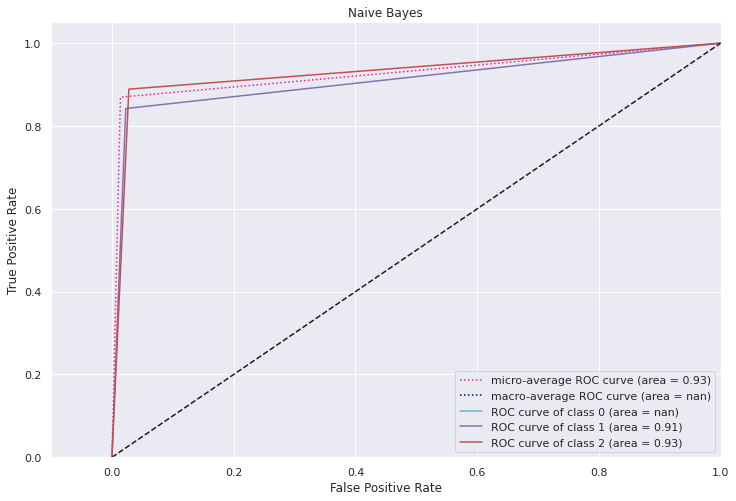

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 0 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


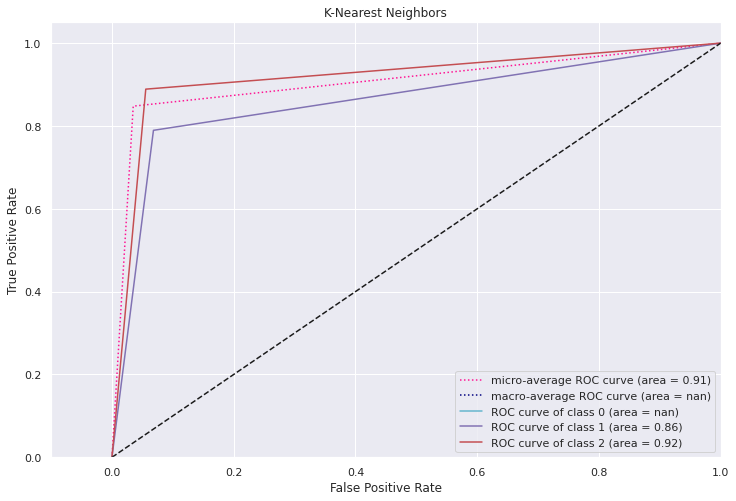

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 0 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


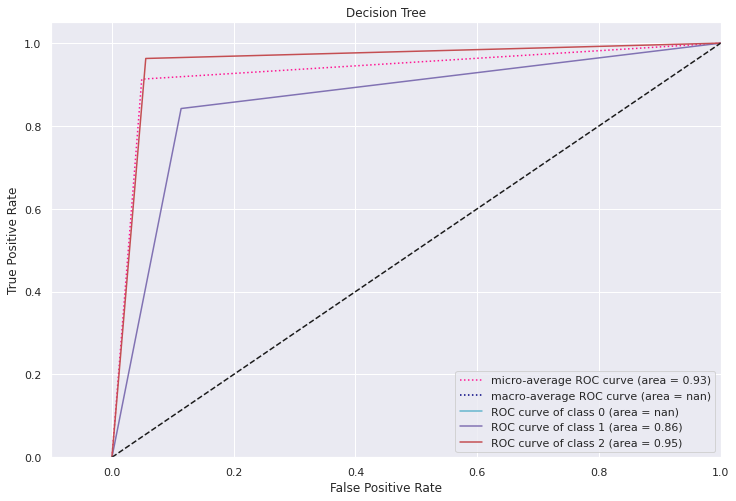

DATASET: Z12


/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 0 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


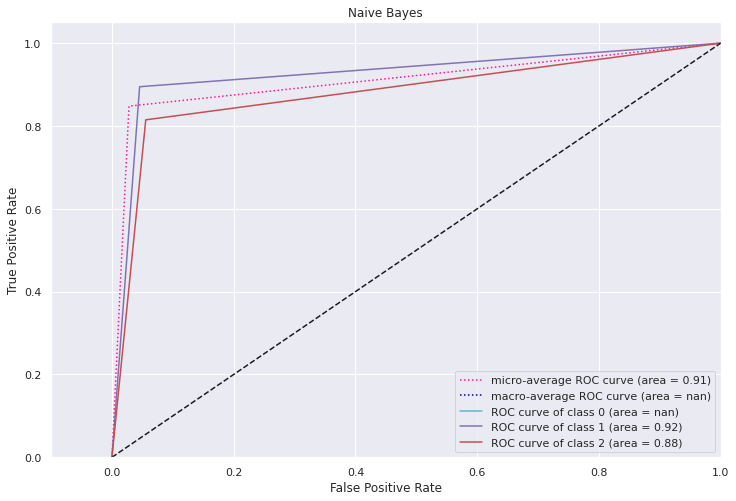

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 0 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


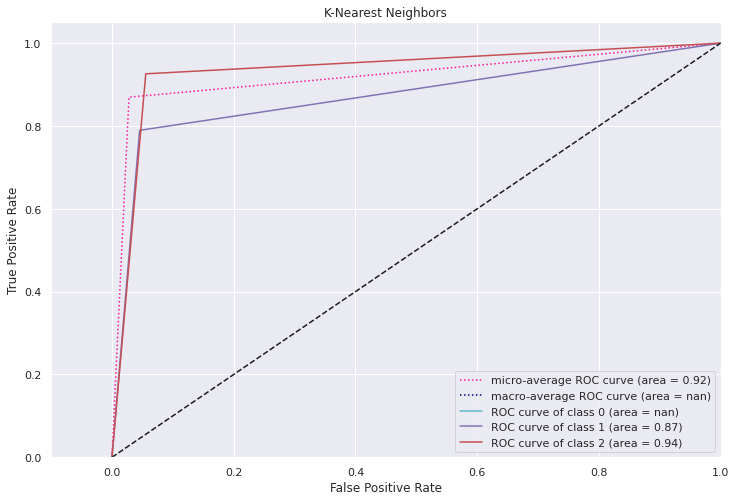

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 0 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


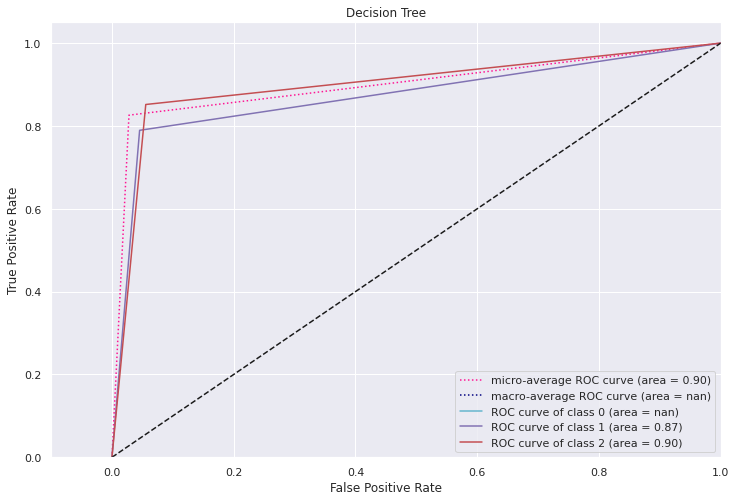

In [ ]:
#ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, X_tr, y_tr, X_tst, y_tst) in enumerate(datasets):
  # Binarize the labels
  y_train = label_binarize(y_tr, classes=[0, 1, 2])
  y_test = label_binarize(y_tst, classes=[0, 1, 2])
  n_classes = y_train.shape[1]
  print(f'DATASET: {name}')

  list_algos = [gnb, knn, dt]
  algo_name = ['Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree']
  for i, (algo, algo_name) in enumerate(zip(list_algos, algo_name)):
    classifier = OneVsRestClassifier(algo)
    y_pred = classifier.fit(X_tr, y_train).predict(X_tst)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i], drop_intermediate=False)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel(), drop_intermediate=False)
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    fig, ax = plt.subplots()

    plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})', color="deeppink", linestyle=':')
    plt.plot(fpr["macro"], tpr["macro"], label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})', color="navy", linestyle=':')

    colors = cycle(['c', 'm', 'r'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i],tpr[i], color=color,label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'{algo_name}')
    plt.legend()
    plt.show()

## **Bar Chart Plot**

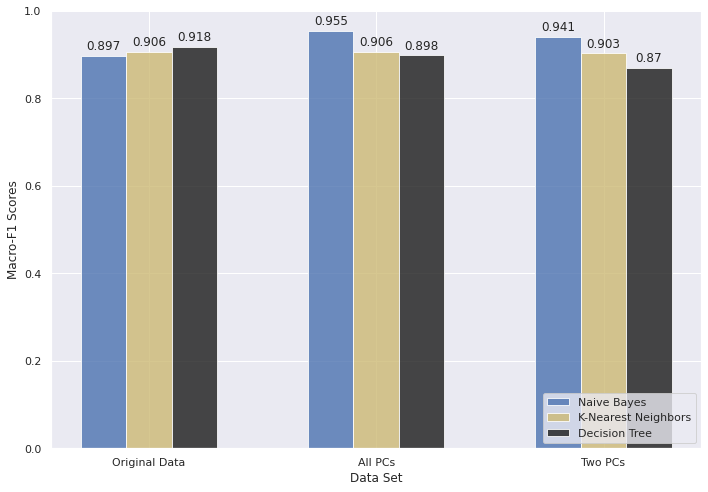

In [ ]:
# ADAPTED FROM: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
def autolabel(rects):
    for r in rects:
        height = r.get_height()
        ax.annotate(f'{height}', xy=(r.get_x() + r.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

n_groups = 3
ind = np.arange(n_groups)

# F1 Scores from above
NB = (0.897, 0.955, 0.941)
KNN = (0.906, 0.906, 0.903)
DT = (0.918, 0.898, 0.870)

# create plot
fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8

rects1 = plt.bar(index, NB, bar_width, alpha=opacity, color='b', label='Naive Bayes')
rects2 = plt.bar(index + bar_width, KNN, bar_width, alpha=opacity, color='y', label='K-Nearest Neighbors')
rects3 = plt.bar(index + bar_width*2, DT, bar_width, alpha=opacity, color='k', label='Decision Tree')

ax.set_xlabel('Data Set')
ax.set_ylabel('Macro-F1 Scores')
#plt.title(f'')
plt.xticks(index + bar_width, ('Original Data', 'All PCs', 'Two PCs'))
plt.legend(loc="lower right")

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()